## Importing libraries 

In [100]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

       
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import time

## 1. Importing Data

In [82]:
airfares = pd.read_excel(r'C:\Users\Sanjeshni\Documents\DIV_IOD\Mini Project 1\Airfares.xlsx')


## 2. Exploring Dataset

## Head

In [83]:
# checking first five rows of the data
airfares.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# check data info
airfares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# Checking mean, median, std and quatiles of the Price featue
airfares.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [ ]:
## From above we cam make out that there will be outliers because max is quiet high compared to min and mean.

## Checking for any null values.

In [5]:
# Checking for any null values.

airfares.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
## Shows that they are one null values

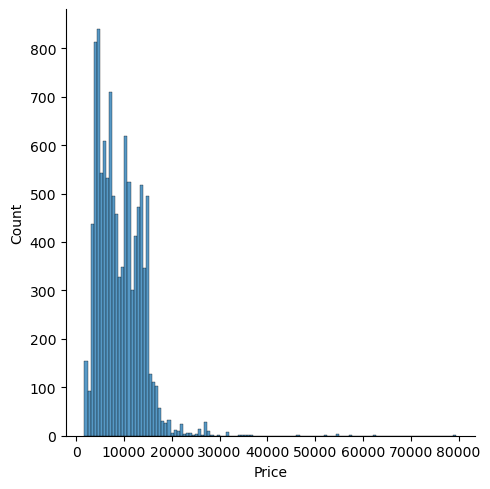

In [6]:
## Using Price as the main feature

sns.displot(x='Price', data=airfares)

<AxesSubplot:xlabel='Price'>

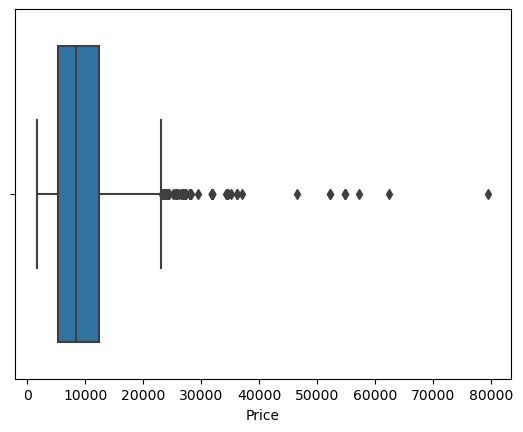

In [7]:
# boxplot show the outliers

sns.boxplot(x='Price', data=airfares)

### Box plot shows there are lots of outliers - this maybe due business class or travel destination

<AxesSubplot:>

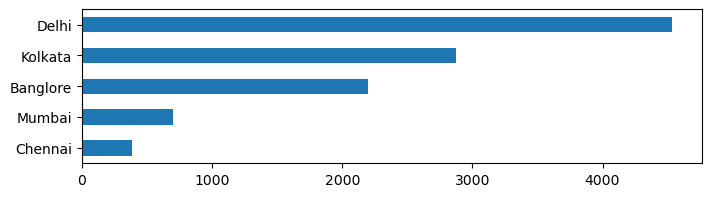

In [89]:
# Which source most travellers used

airfares['Source'].value_counts().sort_values().plot(kind='barh', figsize=(8,2))

<AxesSubplot:>

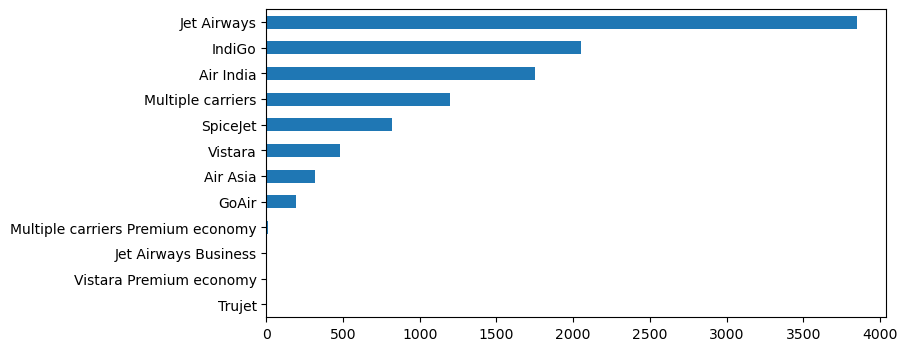

In [95]:
# Which Airlne most travellers used

airfares['Airline'].value_counts().sort_values().plot(kind='barh', figsize=(8,4))

# Feature Engineering

In [8]:
### dropping price to 30000

airfares = airfares.query('Price <= 30000')

Text(0.5, 1.0, 'Number of Seats Sold at Different Price')

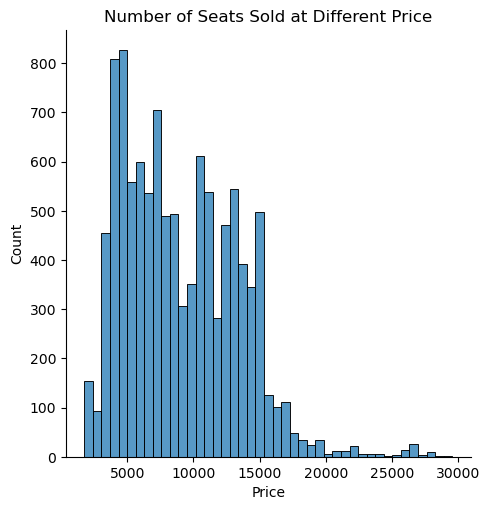

In [9]:
## Using Price as the main feature again to see the change

sns.displot(x='Price', data=airfares)
plt.title('Number of Seats Sold at Different Price')

<AxesSubplot:xlabel='Price'>

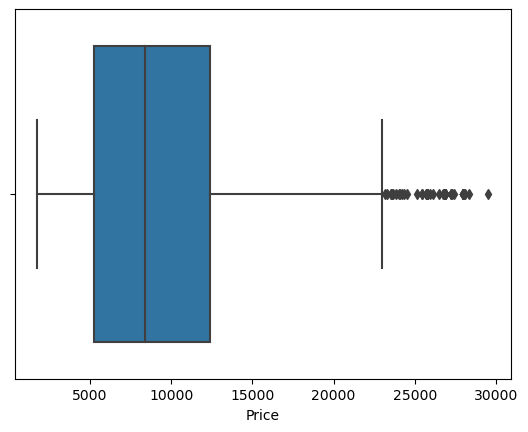

In [10]:
# boxplot show the outliers

sns.boxplot(x='Price', data=airfares)

In [ ]:
## converting date data to datetime

In [56]:
airfares['Date_of_Journey']=pd.to_datetime(airfares['Date_of_Journey'], format='%d/%m/%Y') ## Change depature time to only hour
airfares['Dep_Time'] = airfares['Dep_Time'].str[:2] ##Change arrival time to only hour
airfares['Arrival_Time'] = airfares['Arrival_Time'].str[:2] ##Change duration to only hour
airfares['Duration'] = airfares['Duration'].str[:2]
airfares['Duration'] = airfares['Duration'].str.replace('h', '')

In [57]:
airfares.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22,01,2,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05,13,7,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09,04,19,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18,23,5,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16,21,4,1 stop,No info,13302


In [58]:
# Finding unique values in duration
airfares['Duration'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [61]:
# Dropping unique values

airfares=airfares[airfares['Duration'] != '5m']

In [60]:
airfares['Duration'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [62]:
## Convert depature time, arrival time and duration to int

airfares['Dep_Time'] = airfares['Dep_Time'].astype(str).astype(int)
airfares['Arrival_Time'] = airfares['Arrival_Time'].astype(str).astype(int)
airfares['Duration'] =airfares['Duration'].astype(str).astype(int)

In [63]:
airfares.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22,1,2,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18,23,5,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16,21,4,1 stop,No info,13302


In [64]:
# Replacing values

airfares['Total_Stops'] = airfares['Total_Stops'].str[:1].str.replace('n','0')

In [65]:
airfares.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22,1,2,0,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7,2,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19,2,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18,23,5,1,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16,21,4,1,No info,13302


In [66]:
# dropping na 

airfares=airfares.dropna(how='any')
airfares['Total_Stops'] = airfares['Total_Stops'].astype(str).astype(int)

In [21]:
airfares['Dep_Time'].unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3])

## 

<AxesSubplot:xlabel='Duration', ylabel='Price'>

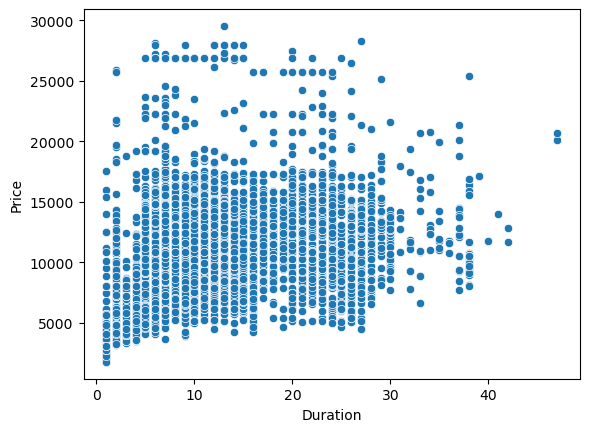

In [22]:
sns.scatterplot(x = 'Duration', y = 'Price', data = airfares)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

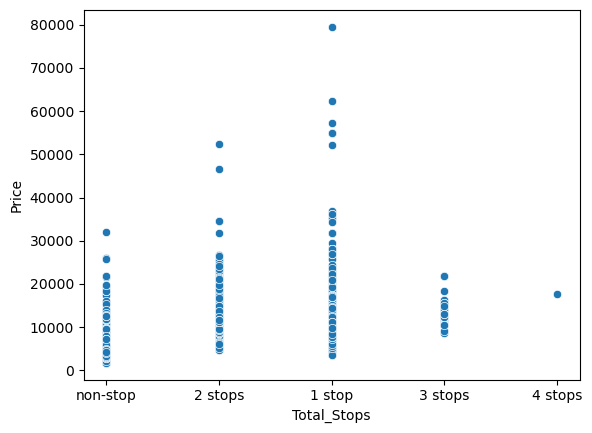

In [106]:
sns.scatterplot(x = 'Total_Stops', y = 'Price', data = airfares, sizes=[8,6])

# 3. Statiscal Overview

## Finding Correlation

In [44]:
airfares.corr()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
Dep_Time,1.000000,0.006113,0.003046,-0.062214,0.001481
Arrival_Time,0.006113,1.000000,0.055569,0.039612,0.034851
Duration,0.003046,0.055569,1.000000,0.740974,0.552282
Total_Stops,-0.062214,0.039612,0.740974,1.000000,0.640802
Price,0.001481,0.034851,0.552282,0.640802,1.000000


<AxesSubplot:>

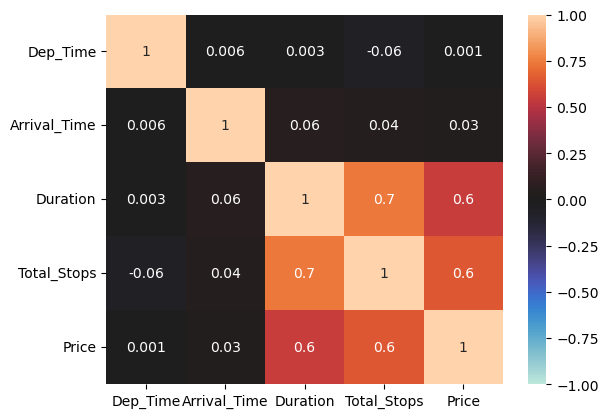

In [25]:
sns.heatmap(airfares.corr(), fmt='.1g',annot=True, vmin=-1, center=0)

In [ ]:
## Total stops and Duration shows best Predictors


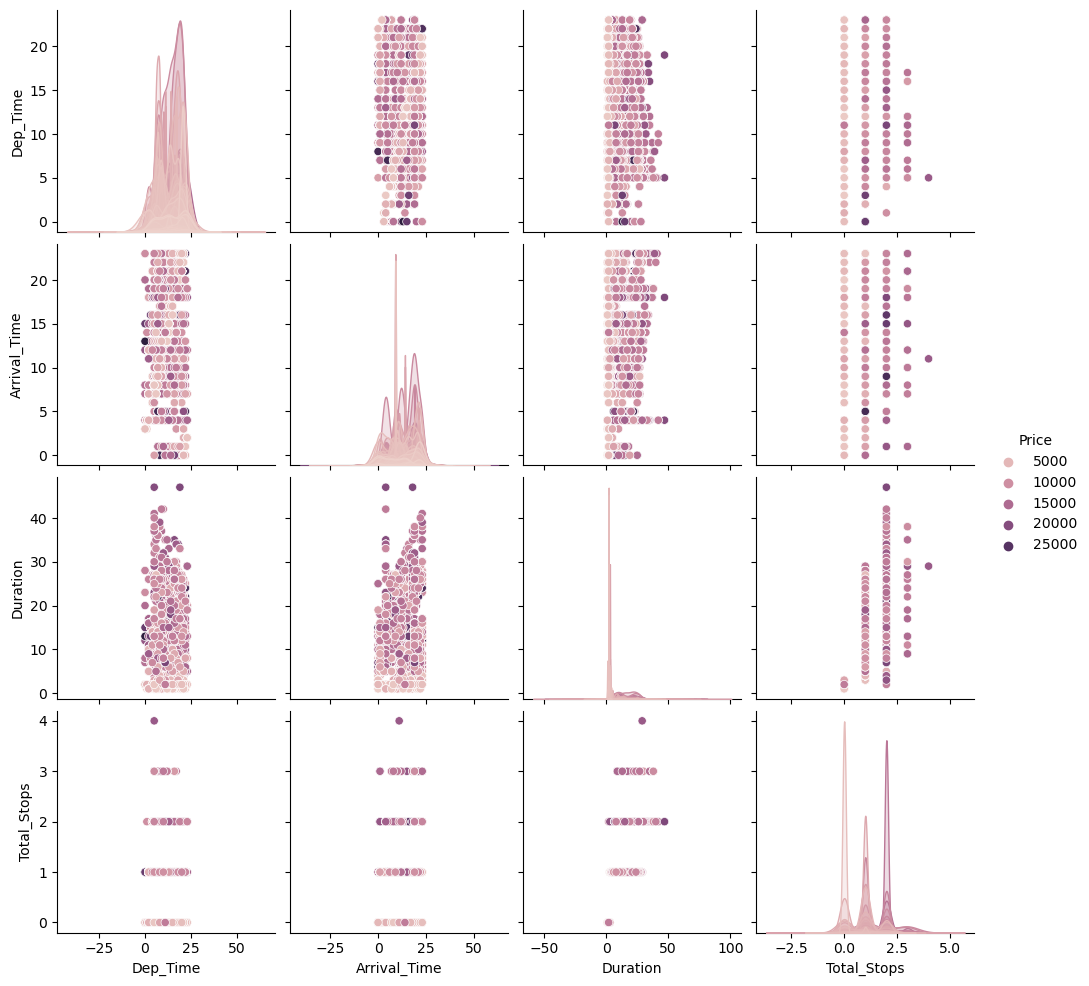

In [47]:
sns.pairplot(airfares, hue= 'Price')

In [67]:
# Calculate the mean for Price  
mean_price = airfares['Price'].mean()
print('Mean Price:', mean_price)

Mean Price: 9086.443123303061


In [68]:
# Calculating mean of the sample
# Taking 10 samples with a sample size of 5


def calculate_sample_mean(airfares, column_name= 'Price', N=10, sample_size=5):
    '''
    df: DataFrame
    column_name: String, column_name
    N: Number of samples
    sample_size: Size of sample for each sample
    '''
    sample_mean_list = []

    for i in range(N):
        airfares_sample = airfares.sample(n=sample_size)
        sample_mean = airfares_sample[column_name].mean()
        sample_mean_list.append(sample_mean)
    
    return sample_mean_list


In [69]:
def visual_sample_mean(Duration_mean, sample_mean_list):
    '''
    Duration_mean: mean of Duration
    sample_mean_list: list of sample mean
    '''
    
    sample_mean = np.mean(sample_mean_list)
    
    ax = sns.distplot(sample_mean_list);
    
    # plot a vertical line for population mean and sample mean
    ax.axvline(Duration_mean, color='black', linestyle='solid', lw=1)
    ax.axvline(sample_mean, color='red', linestyle='dashed', lw=1)
    
    plt.xlabel('Mean of Samples')
    plt.ylabel('Frequency')

    plt.show()

In [30]:
sample_mean_list = calculate_sample_mean(airfares
                                         , 'Price'
                                         , N=10
                                         , sample_size=5)

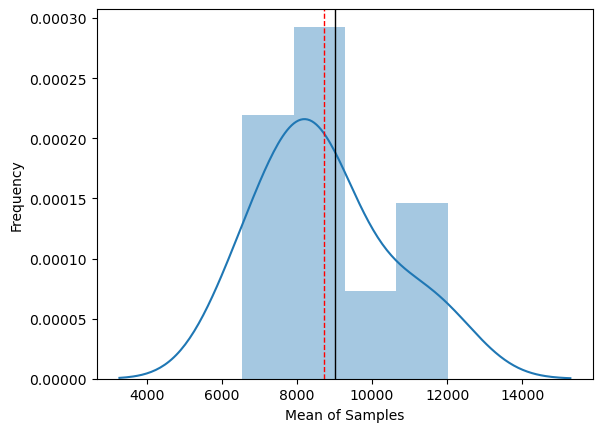

In [108]:
visual_sample_mean(mean_price, sample_mean_list)

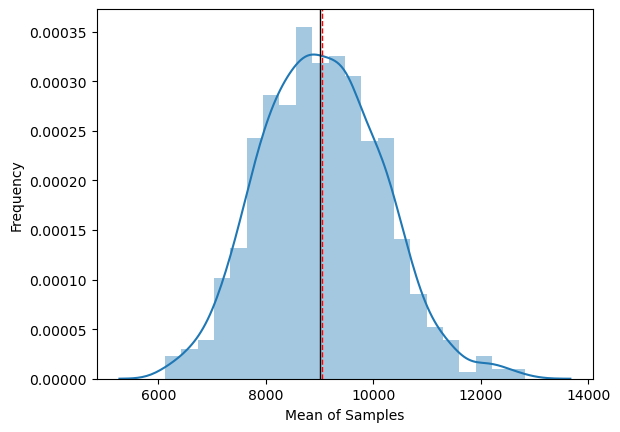

In [48]:
# Ploting using 1000 samples with the sample size 15

sample_mean_list = calculate_sample_mean(airfares
                                         , 'Price'
                                         , N=1000
                                         , sample_size=15)

visual_sample_mean(mean_price, sample_mean_list)

## Hypothesis Testing

In [32]:
# Setting Alpha as 0.05
alpha = 0.05 

In [72]:
# created two samples
N = 50
price_over_11000 = airfares[airfares['Price'] > 11000]['Duration'].sample(N)
price_under_11000 = airfares[airfares['Price'] <= 11000]['Duration'].sample(N)

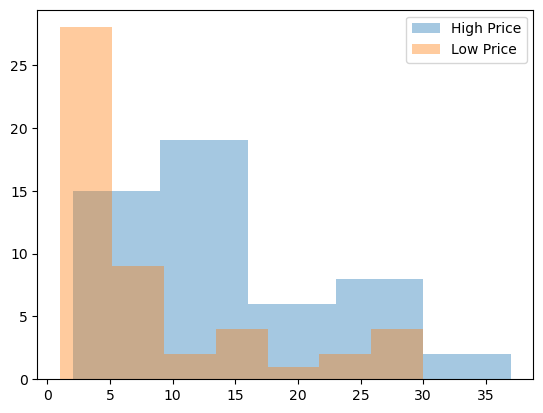

In [73]:
ax = sns.distplot(price_over_11000, label= 'High Price', kde=False);
sns.distplot(price_under_11000, ax=ax, label = 'Low Price', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

In [74]:
var_price_over_11000 = price_over_11000.var()
print(var_price_over_11000)
var_price_under_11000 = price_under_11000.var()
print(var_price_under_11000) 

68.44122448979591
69.9465306122449


In [75]:
np.var(price_over_11000, ddof=1)

68.44122448979591

In [76]:
null_hypothesis = {
    'HO': " Fare price does not increase for longer duration."
    , 'H1': "Fare price increase for longer duration."
}

In [77]:
def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calulated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("we reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("we fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [81]:
t2, p2 = stats.ttest_ind(price_over_11000, price_under_11000)
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, alpha)

t = 3.55842549136334
p = 0.0005770356912377275
we reject our null hypothesis.
Fare price increase for longer duration.


# Thank You